count    1000000.000000
mean        7002.721864
std         1799.859287
min        -2004.137572
25%         5787.607348
50%         7004.297915
75%         8216.303397
max        15489.991876
dtype: float64

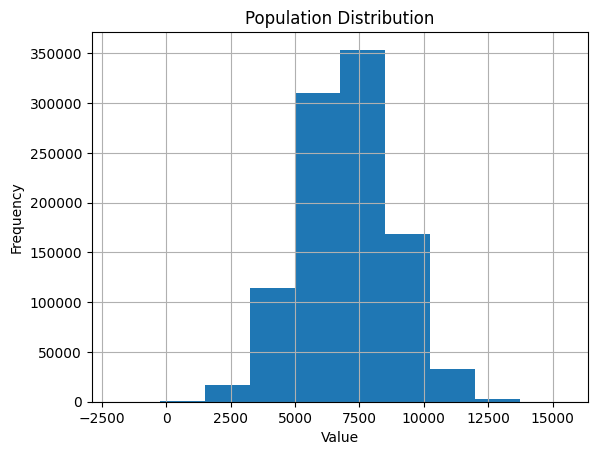

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

np.random.seed(0)

true_mean, true_sd = 7000, 1800
pop = np.random.normal(true_mean, true_sd, size=1_000_000)
pd.Series(pop).hist()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Population Distribution')
pd.Series(pop).describe()

In [2]:
def sample_mean(n):
    return np.mean(np.random.choice(pop, size=n, replace=False))

R = 2000
means_n30 = np.array([sample_mean(30) for _ in range(R)])
means_n200 = np.array([sample_mean(200) for _ in range(R)])




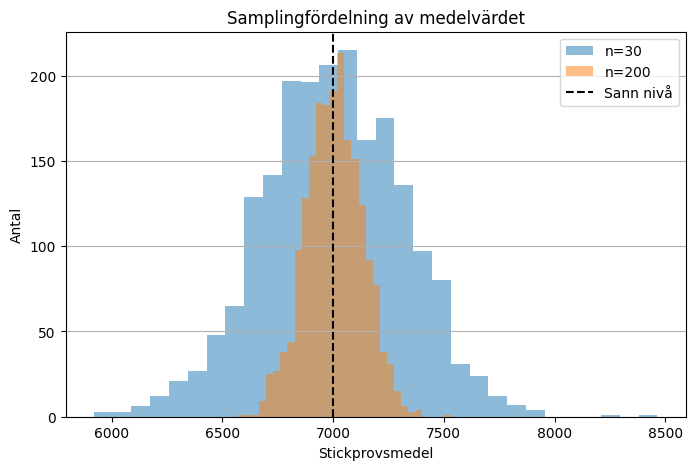

In [4]:
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(means_n30, bins=30, alpha=0.5, label='n=30')
ax.hist(means_n200, bins=30, alpha=0.5, label='n=200')
ax.axvline(true_mean, color='k', linestyle='--', label='Sann nivå')
ax.set_title('Samplingfördelning av medelvärdet')
ax.set_xlabel('Stickprovsmedel')
ax.set_ylabel('Antal')

ax.grid(True, axis='y')
ax.legend()
plt.show()

In [9]:
sd = np.std(pop, ddof=1)
SE_n30 = sd/np.sqrt(30)
SE_n200 = sd/np.sqrt(200) 

print(f'SE för n=30: {SE_n30:.2f}')
print(f'SE för n=200: {SE_n200:.2f}')

SE för n=30: 328.61
SE för n=200: 127.27


In [11]:
def ci_95(x):
    m = x.mean()
    s = x.std(ddof=1)
    se = s / np.sqrt(len(x))
    z = 1.96
    return m - z * se, m + z * se
    

def coverage(n, R=1000):
    ok = 0
    for _ in range(R):
        x = np.random.choice(pop, size=n, replace=False)
        low, hig = ci_95(pd.Series(x))
        ok += (low <= true_mean <= hig)
    return ok / R

coverage(30),coverage(200) 

(np.float64(0.94), np.float64(0.944))

In [ ]:
import random

# Anta att vi har en population 
population = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

# Vi tar ett slumpmässigt urval (stickprov) på 4 element
sample = random.sample(population, 4)
print("Slumpmässigt urval (stickprov):", sample)
# denna random.sample() tillåter inte återläggning alltså samma värde kan inte väljas flera gånger

Slumpmässigt urval (stickprov): [8, 2, 3, 10]


In [ ]:
# om man vill tilåta att samma värde väljas flera gånger
import random
sample_with_replacement = [random.choice(population) for _ in range(4)]
print("Slumpmässigt urval med återläggning:", sample_with_replacement)
# här kan samma värde väljas flera gånger

Slumpmässigt urval med återläggning: [9, 10, 3, 5]


In [86]:
# med numpy kan man göra samma sak men snabbare
import numpy as np

population = np.arange(1,11)
sample = np.random.choice(population, size=4, replace=False) # utan återläggning
print("Slumpmässigt urval (stickprov) med numpy:", sample)

Slumpmässigt urval (stickprov) med numpy: [6 3 2 8]


### Sampling och Variation

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

np.random.seed(0)
true_mean, true_sd = 7_000, 1_800

pop = np.random.normal(true_mean, true_sd, size=1_000_000)
pd.Series(pop).describe()


count    1000000.000000
mean        7002.721864
std         1799.859287
min        -2004.137572
25%         5787.607348
50%         7004.297915
75%         8216.303397
max        15489.991876
dtype: float64

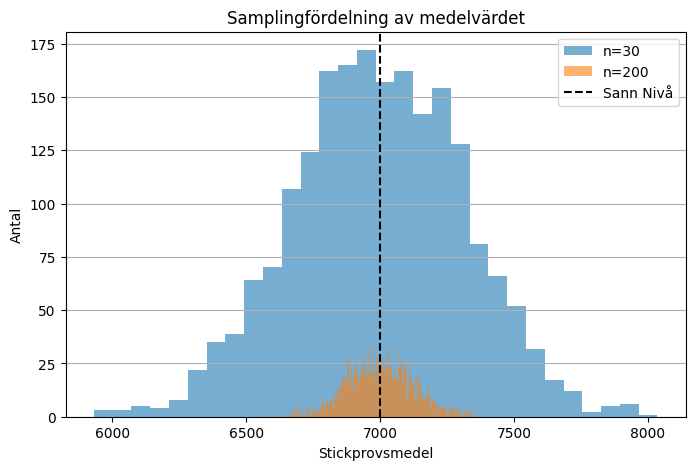

In [4]:
def sample_mean(n):
    return np.mean(np.random.choice(pop, size=n, replace=False))

R = 2_000
means_n30 = np.array([sample_mean(30) for  _ in range(R)])
means_n200 = np.array([sample_mean(200) for  _ in range(R)])


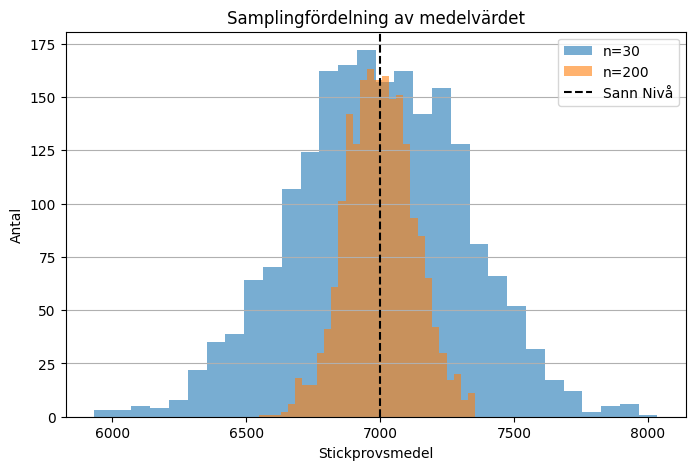

In [6]:
fig, ax =plt.subplots(figsize=(8,5))
ax.hist(means_n30, bins=30, alpha=0.6, label='n=30')
ax.hist(means_n200, bins=30, alpha=0.6, label='n=200')

ax.axvline(true_mean, color='k', linestyle='--', label='Sann Nivå')
ax.set_title('Samplingfördelning av medelvärdet')
ax.set_xlabel('Stickprovsmedel')
ax.set_ylabel('Antal')
ax.grid(True, axis='y')
ax.legend()
plt.show()

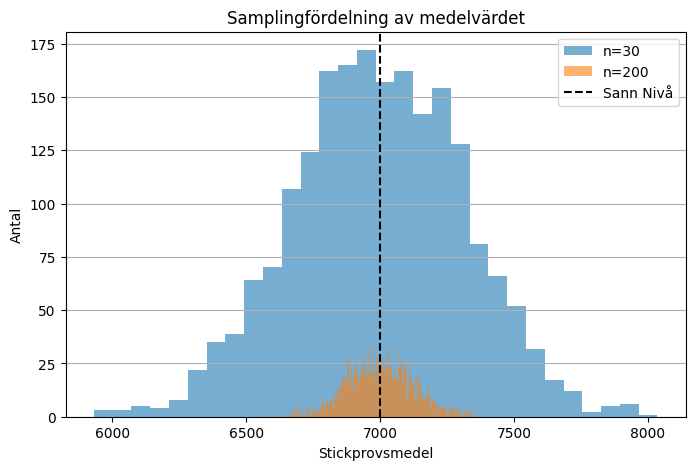

In [7]:
fig, ax =plt.subplots(figsize=(8,5))
ax.hist(means_n30, bins=30, alpha=0.6, label='n=30')
ax.hist(means_n200, bins=200, alpha=0.6, label='n=200')

ax.axvline(true_mean, color='k', linestyle='--', label='Sann Nivå')
ax.set_title('Samplingfördelning av medelvärdet')
ax.set_xlabel('Stickprovsmedel')
ax.set_ylabel('Antal')
ax.grid(True, axis='y')
ax.legend()
plt.show()

#### Standard Error

In [10]:
sd = np.std(pop, ddof=1)
SE_n30 = sd / np.sqrt(30)
SE_n200 = sd / np.sqrt(200)

print(f'Standard Error, eller fel för n_30 är: {SE_n30}')
print(f'Standard Error, eller fel för n_200 är: {SE_n200}')


Standard Error, eller fel för n_30 är: 328.60784389784334
Standard Error, eller fel för n_200 är: 127.26927068494739


In [11]:
def ci_95(x):
    m = x.mean()
    s = x.std(ddof=1)
    se = s / np.sqrt(len(x))
    z = 1.96
    return m - z*se, m + z*se

def coverage(n, R=1000):
    ok = 0
    for _ in range(R):
        x = np.random.choice(pop, size=n, replace=False)
        low, hig = ci_95(pd.Series(x))
        ok += (low <= true_mean <= hig)
    return ok / R

coverage(30), coverage(200)

(np.float64(0.934), np.float64(0.943))

In [15]:
x = np.random.choice(pop, size=60, replace=False)

m = x.mean()
s = x.std(ddof=1)
se = s / np.sqrt(len(x))
z = 1.96
ci = (m - z*se, m + z*se)

print('Stickprovssnitt', round(m, 1),'\n','CI95:', tuple(round(c, 1) for c in ci),'\n', 'Sann Nivå:', true_mean)

Stickprovssnitt 6764.5 
 CI95: (np.float64(6308.4), np.float64(7220.7)) 
 Sann Nivå: 7000


In [19]:
A = np.random.choice(pop, size=60, replace=False)
B = np.random.choice(pop, size=60, replace=False)


obs = B.mean() - A.mean()
all_values = np.concatenate([A, B])
nA = len(A)
R = 5000

perm = np.empty(R)
for i in range(R):
    np.random.shuffle(all_values)
    perm[i] = all_values[nA:].mean() - all_values[:nA].mean()

p = np.mean(np.abs(perm) >= abs(obs))
print(p)
p


0.563


np.float64(0.563)